# Handwritten Digit Recognition

## Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
x,y=mnist['data'],mnist['target']

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
%matplotlib inline

In [7]:
import matplotlib
import matplotlib.pyplot as plt

In [8]:
some_digit = x.iloc[3601]
some_digit_image = some_digit.values.reshape(28,28) # lets reshape

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

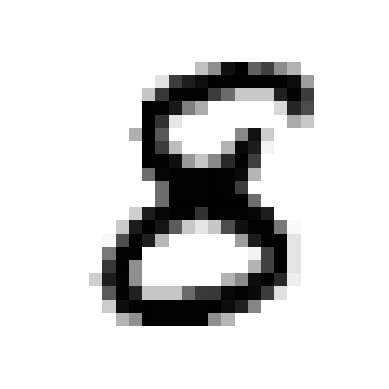

In [9]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")

In [10]:
y[3601]

'8'

In [11]:
x_train,x_test = x[0:6000],x[6000:7000]

In [12]:
y_train,y_test = y[0:6000],y[6000:7000]

In [14]:
import numpy as np

shuffle_index = np.random.permutation(6000)
x_train, y_train = x_train.iloc[shuffle_index], y_train.iloc[shuffle_index]


## Creating a 2 detector

In [21]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

y_train_2=(y_train==2)
y_test_2 =(y_test==2)

In [22]:
y_train

104     1
4032    9
970     5
2147    0
4693    9
       ..
1943    8
3686    4
369     4
5184    3
4269    2
Name: class, Length: 6000, dtype: int8

In [23]:
y_test_2

6000    False
6001    False
6002    False
6003    False
6004    False
        ...  
6995    False
6996    False
6997    False
6998    False
6999    False
Name: class, Length: 1000, dtype: bool

In [24]:
from sklearn.linear_model import LogisticRegression

In [33]:


clf = LogisticRegression(max_iter=2000)
clf.fit(x_train, y_train_2)


LogisticRegression(max_iter=2000)

In [37]:
some_digit_array = some_digit.to_numpy().reshape(1, -1)
some_digit_df = pd.DataFrame(some_digit_array, columns=x_train.columns)
prediction = clf.predict(some_digit_df)
print("Prediction:", prediction[0])


Prediction: False


In [39]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf,x_train,y_train_2,cv=3,scoring="accuracy")

In [40]:
a.mean()

np.float64(0.9574999999999999)

#    ** The END **